In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

## Modelo ARDL

De acuerdo con lo aprendido con los tutoriales se procede a aplicar el modelo ADRL a los datos solicitados.

In [2]:
# Primero se actualiza la versión de R en Kaggle, así como algunas versiones de dependencias de la paquetería ARDL. Este proceso es tardado.
#install.packages("CCA")
devtools::install_version("pbkrtest", version = "0.5.1")

xfun       (0.41      -> 0.44     ) [CRAN]
rlang      (1.1.2     -> 1.1.3    ) [CRAN]
glue       (1.6.2     -> 1.7.0    ) [CRAN]
cli        (3.6.1     -> 3.6.2    ) [CRAN]
withr      (2.5.2     -> 3.0.0    ) [CRAN]
fansi      (1.0.5     -> 1.0.6    ) [CRAN]
stringi    (1.8.2     -> 1.8.4    ) [CRAN]
tidyselect (1.2.0     -> 1.2.1    ) [CRAN]
Rcpp       (1.0.11    -> 1.0.12   ) [CRAN]
pkgbuild   (1.4.2     -> 1.4.4    ) [CRAN]
fs         (1.6.3     -> 1.6.4    ) [CRAN]
ps         (1.7.5     -> 1.7.6    ) [CRAN]
processx   (3.8.2     -> 3.8.4    ) [CRAN]
pkgload    (1.3.3     -> 1.3.4    ) [CRAN]
digest     (0.6.33    -> 0.6.35   ) [CRAN]
desc       (1.4.2     -> 1.4.3    ) [CRAN]
callr      (3.7.3     -> 3.7.6    ) [CRAN]
brio       (1.1.3     -> 1.1.5    ) [CRAN]
testthat   (3.2.1     -> 3.2.1.1  ) [CRAN]
yaml       (2.3.7     -> 2.3.8    ) [CRAN]
tidyr      (1.3.0     -> 1.3.1    ) [CRAN]
RcppEigen  (0.3.3.9.4 -> 0.3.4.0.0) [CRAN]
minqa      (1.2.6     -> 1.2.7    ) [CRAN]
knitr      

Installing 26 packages: xfun, rlang, glue, cli, withr, fansi, stringi, tidyselect, Rcpp, pkgbuild, fs, ps, processx, pkgload, digest, desc, callr, brio, testthat, yaml, tidyr, RcppEigen, minqa, knitr, broom, lme4

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘glue’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘fansi’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘Rcpp’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘fs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘tidyselect’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("ARDL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘car’, ‘dynlm’




In [4]:
## Se cargan las librerías necesarias
library(ARDL)
library(tidyverse) 
library(fields)  
library(forecast)  
library(quantmod) 
library(dygraphs) 
library(dplyr)    
library(ggplot2) 
library(tseries)   
library(tidyverse)   
library(urca)
library(TSstudio)
theme_set(theme_bw())
options(warn = - 1) 

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.4.
  https://CRAN.R-project.org/package=ARDL

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:ba

ERROR: Error in library(TSstudio): there is no package called ‘TSstudio’


### Carga de los datos

Se procede a cargar la información de acuerdo a lo especificado en el modulo

In [8]:
# Especificamos las fechas de inicio y fin.
start<-format(as.Date("2019-04-22"),"%Y-%m-%d")
end<-format(as.Date("2022-12-31"),"%Y-%m-%d")

#Se crea la función para traer la información de yahoo finance
precio<-function(simbolo) {
  ##---------Obtener precios de yahoo finance:
  datos<-getSymbols(simbolo,  from=start, to= end, auto.assign = FALSE)
  ##---------eliminar datos faltantes:
  datos<-na.omit(datos)
  ##--------Mantener el precio de interis:
  datos<-datos[,4]
  assign(simbolo, datos, envir = .GlobalEnv)
}

In [9]:
### Importamos la información

precio("RYLD")   
precio("TSLA") 
precio("TM")
precio("GM")


In [10]:
## Juntamos la información
prices<-merge.xts(`RYLD`,`TSLA`, `TM`, `GM`,join='inner')%>% na.omit()
dim(prices)
## Cambiamos los nombres de las columnas
colnames(prices)<-c("RYLD", "TSLA", "TM", "GM")
head(prices)

Warning message in merge.xts(RYLD, TSLA, TM, GM, join = "inner"):
“'join' only applicable to two object merges”


[1] 933   4

             RYLD     TSLA     TM    GM
2019-04-22 24.995 17.51667 124.16 39.50
2019-04-23 25.157 17.59333 124.94 39.83
2019-04-24 25.189 17.24400 122.88 39.72
2019-04-25 25.130 16.50867 123.19 39.11
2019-04-26 25.225 15.67600 123.62 39.68
2019-04-29 25.250 16.09800 123.81 40.01

### Validación de la información

Se procede a visualizar la información y verificar que no sea estacionaria.

In [23]:
## Se traspasa al formato ts y se separan por variable para facilitar su manejo
y <- ts(prices$RYLD, start = c(2017, 5), frequency = 365)
tsla <- ts(prices$TSLA, start = c(2017, 5), frequency = 365)
tm <- ts(prices$TM, start = c(2017, 5), frequency = 365)
gm <- ts(prices$GM, start = c(2017, 5), frequency = 365)

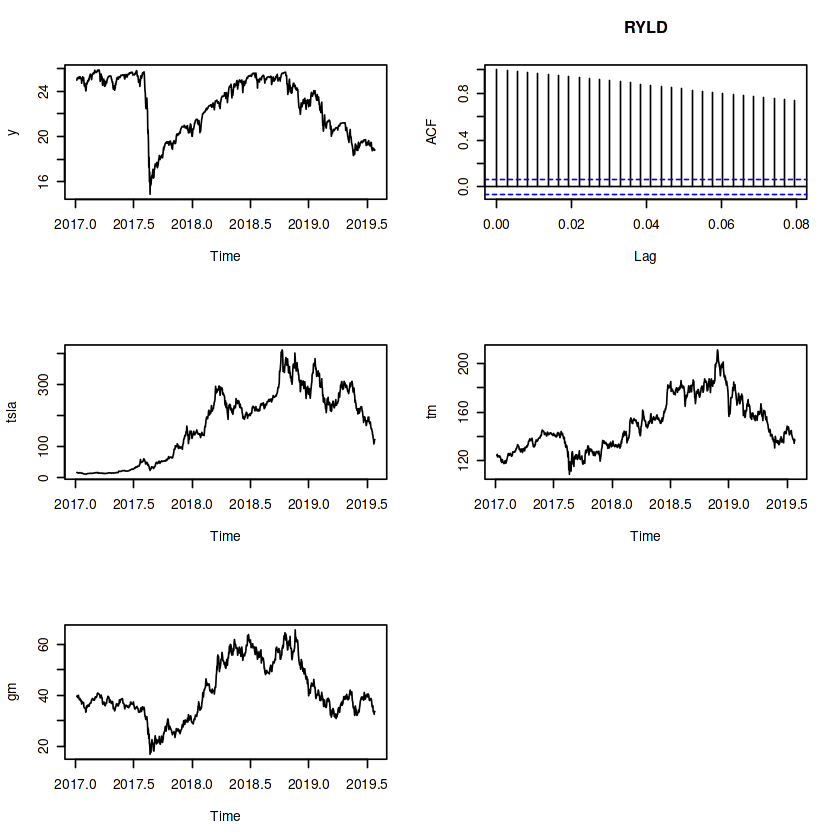

In [24]:
## Se procede a visualizar la serie de tiempo y confirmar que la variable dependiente o de respuesta no es estacionaria

#Podemos  visualizar la serie de tiempo y confirmar que la variable de respuesta no es estacionaria (mediante el acf)
par(mfrow=c(3,2))
ts.plot(y)
acf(y)
ts.plot(tsla)
ts.plot(tm)
ts.plot(gm)

#### Prueba de estacionariedad

Se procede a verificar que la información de la variable de respuesta no sea estacionaria

In [20]:
install.packages("fUnitRoots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
## Se cargan librerias que se necesitaran para proceder
library(fUnitRoots)
adfTest(y)
adfTest(tsla)
adfTest(tm)
adfTest(gm)



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -1.0095
  P VALUE:
    0.2946 

Description:
 Wed May 22 02:46:44 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.4265
  P VALUE:
    0.4804 

Description:
 Wed May 22 02:46:44 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.0794
  P VALUE:
    0.591 

Description:
 Wed May 22 02:46:44 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.5451
  P VALUE:
    0.4426 

Description:
 Wed May 22 02:46:44 2024 by user: 

Ya que los resultados de p-value son mayores al 5% no podemos rechazar la hipotesis nula por lo que se puede afirmar que ninguna de las series es estacionaria

### Partición de la Información

Se procede a partir la información de acuerdo con lo solicitado con lo datos de test siendo un 5% del total. Se debe tomar en cuenta que en este caso RYLD sera la variable dependiente y.

In [40]:
## Se procede a partir la informacióm
Pr <- precio.ts
h <- round(length(Pr)*0.05, digits = 0 )
h
Pr_tra <- Pr[1:(nrow(Pr) - h), ]
Pr_tes<- Pr[(nrow(Pr) - h + 1):nrow(Pr), ]

[1] 187

### Construcción del modelo ARDL

Ya verificado que las series no son estacionarias se procede a construir el modelo con base en lo aprendido con los tutoriales de clase

In [30]:
#Se realiza una búsqueda tipo grid search:
#Selección automatica:
models <- auto_ardl(RYLD ~ TSLA +TM + GM, data = Pr_tra, max_order = 6)

In [31]:
#Revisemos el top 20 de los mejores modelos según su critrio de información de Akaike
models$top_orders

RYLD,TSLA,TM,GM,AIC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,3,-243.5539
3,2,1,3,-243.0087
3,1,2,3,-241.7062
3,2,2,3,-241.1285
3,1,1,4,-240.4193
4,1,1,3,-240.2553
4,2,1,3,-239.6883
3,2,3,3,-239.6807
4,1,1,4,-238.7867


In [33]:
## Se procede a construir el modelo con la mejor combinación
#Procedemos a construir el modelo de regresión con la mejor combinación.
mod1 <- ardl(RYLD ~ TSLA +TM + GM, data = Pr_tra, order = c(3,1,1,2))
summary(mod1)


Time series regression with "ts" data:
Start = 4, End = 746

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73613 -0.09492  0.01846  0.11001  0.73241 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.097104   0.102372   0.949   0.3432    
L(RYLD, 1)   0.841878   0.033609  25.049  < 2e-16 ***
L(RYLD, 2)   0.340839   0.039437   8.643  < 2e-16 ***
L(RYLD, 3)  -0.199551   0.028090  -7.104 2.88e-12 ***
TSLA         0.006582   0.001035   6.357 3.62e-10 ***
L(TSLA, 1)  -0.007023   0.001048  -6.701 4.13e-11 ***
TM           0.027744   0.003868   7.173 1.80e-12 ***
L(TM, 1)    -0.026196   0.003893  -6.729 3.45e-11 ***
GM           0.095825   0.007949  12.054  < 2e-16 ***
L(GM, 1)    -0.077237   0.011179  -6.909 1.06e-11 ***
L(GM, 2)    -0.015625   0.008217  -1.902   0.0576 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standar

In [34]:
## Se imprime la formula para poder observar los srezagos
mod1$full_formula

RYLD ~ L(RYLD, 1) + L(RYLD, 2) + L(RYLD, 3) + TSLA + L(TSLA, 
    1) + TM + L(TM, 1) + GM + L(GM, 1) + L(GM, 2)

In [35]:
### Se podría generar un modelo con tendencia para ver como se comporta. Sin embargo, se destaca que Y no parecia tener tendencia
mod1_ten <- ardl(RYLD ~ TSLA +TM + GM + trend(RYLD),data = Pr_tra, order = c(3,1,3,2))
summary(mod1_ten)


Time series regression with "ts" data:
Start = 4, End = 746

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73193 -0.09321  0.01664  0.10932  0.74198 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1049418  0.1035453   1.013   0.3112    
trend(RYLD) -0.0001132  0.0001655  -0.684   0.4942    
L(RYLD, 1)   0.8461271  0.0350004  24.175  < 2e-16 ***
L(RYLD, 2)   0.3362588  0.0435535   7.721 3.82e-14 ***
L(RYLD, 3)  -0.2021060  0.0320767  -6.301 5.12e-10 ***
TSLA         0.0066502  0.0010442   6.369 3.37e-10 ***
L(TSLA, 1)  -0.0069831  0.0010511  -6.644 5.98e-11 ***
TM           0.0280807  0.0039012   7.198 1.52e-12 ***
L(TM, 1)    -0.0283744  0.0056994  -4.979 8.00e-07 ***
L(TM, 2)     0.0016553  0.0056944   0.291   0.7714    
L(TM, 3)     0.0007458  0.0038664   0.193   0.8471    
GM           0.0955601  0.0079881  11.963  < 2e-16 ***
L(GM, 1)    -0.07

### Pronóstico 

Se realiza el pronostico a 10 días de acuerdo con lo solicitado. Para lograr esto se corre el modelo con los datos completos (prrecio.ts)

In [36]:
### Se vuelve a correr el modelo sin tendencia con las caracteristicas definidas
mod1 <- ardl(RYLD ~ TSLA +TM + GM, data = precio.ts, order = c(3,1,1,2))
summary(mod1)


Time series regression with "ts" data:
Start = 2017(8), End = 2019(207)

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72656 -0.09580  0.01574  0.10989  0.79423 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1094189  0.0833888   1.312   0.1898    
L(RYLD, 1)   0.8616306  0.0302032  28.528  < 2e-16 ***
L(RYLD, 2)   0.2943282  0.0357518   8.233 6.25e-16 ***
L(RYLD, 3)  -0.1719154  0.0249139  -6.900 9.65e-12 ***
TSLA         0.0059154  0.0008673   6.820 1.65e-11 ***
L(TSLA, 1)  -0.0062903  0.0008673  -7.253 8.67e-13 ***
TM           0.0265216  0.0033992   7.802 1.65e-14 ***
L(TM, 1)    -0.0251485  0.0034255  -7.342 4.64e-13 ***
GM           0.0948501  0.0072638  13.058  < 2e-16 ***
L(GM, 1)    -0.0778728  0.0101714  -7.656 4.85e-14 ***
L(GM, 2)    -0.0144015  0.0073611  -1.956   0.0507 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

          Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2019.5671       19.57145 19.33266 19.81024 19.20626 19.93665
2019.5699       19.58263 19.23403 19.93124 19.04949 20.11578
2019.5726       19.70305 19.26446 20.14164 19.03228 20.37381
2019.5753       19.66525 19.14710 20.18339 18.87281 20.45768
2019.5781       19.72781 19.13709 20.31853 18.82439 20.63123
2019.5808       19.91807 19.26004 20.57609 18.91171 20.92443
2019.5836       19.83381 19.11273 20.55489 18.73101 20.93661
2019.5863       19.93871 19.15814 20.71928 18.74494 21.13249
2019.5890       19.92896 19.09198 20.76594 18.64891 21.20901
2019.5918       19.36619 18.47550 20.25688 18.00400 20.72839

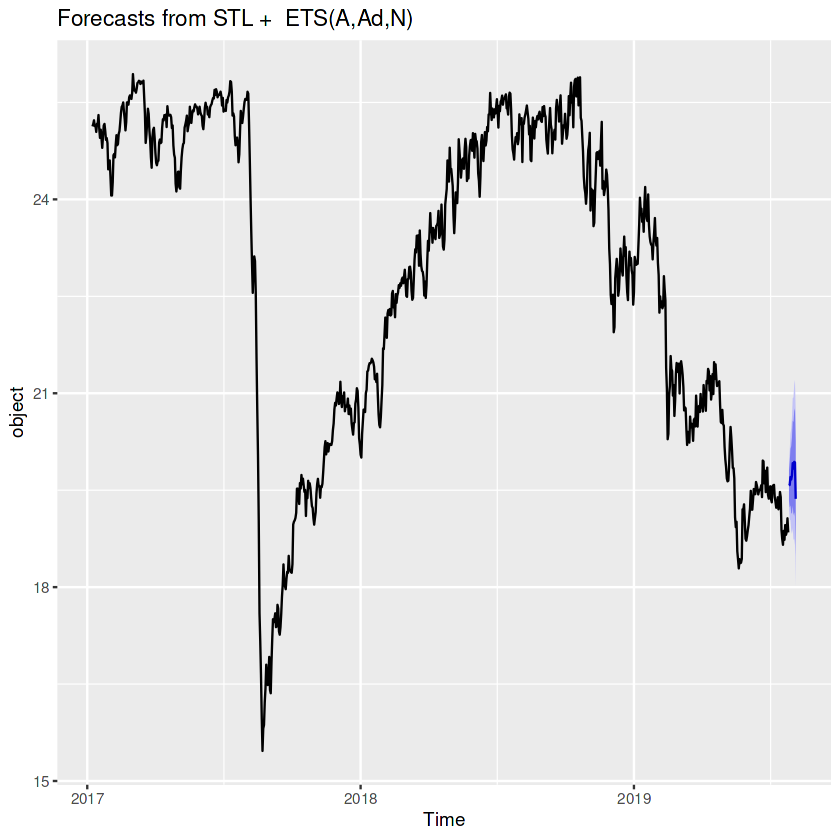

In [37]:
### Se corre la predicción a 10 días
stats::predict(mod1$fitted.values, h=10)
autoplot(predict(mod1$fitted.values, h=10))

### Cálculo de métricas de error de pronóstico

Se procede a calcular las metricas de error de pronostico para los dos modelos

#### Modelo 1 (Sin Tendencia)

Se realiza la prueba con el modelo 1. Cabe destacar que se corre el modelo nuevamente con los datos Pr_tra

In [38]:
mod1 <- ardl(RYLD ~ TSLA +TM + GM, data = Pr_tra, order = c(3,1,1,2))

In [46]:
str(Pr_tes)

y_test = Pr_tes$RYLD

 num [1:187, 1:4] 23.8 23.5 23.5 23.4 23.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "RYLD" "TSLA" "TM" "GM"


ERROR: Error in Pr_tes$RYLD: $ operator is invalid for atomic vectors


In [48]:
## Se defienn los valores reales de RYLD en el test
real_values <- Pr_tes[, "RYLD"]
## Se calculan los nuevos valores con RYLD
predicted_values <- predict(mod1, newdata = Pr_tes[, "TSLA", "TM", "GM"])

ERROR: Error in Pr_tes[, "TSLA", "TM", "GM"]: incorrect number of dimensions


In [44]:
head(Pr_tra)

RYLD,TSLA,TM,GM
24.995,17.51667,124.16,39.50
25.157,17.59333,124.94,39.83
25.189,17.24400,122.88,39.72
25.130,16.50867,123.19,39.11
25.225,15.67600,123.62,39.68
25.250,16.09800,123.81,40.01
